In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("custo_churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.drop('customerID',axis='columns',inplace=True)

In [6]:
df.TotalCharges.values[6]

'1949.4'

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

In [10]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [12]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
churn_no = df1[df1.Churn=='No'].tenure
churn_yes =df1[df1.Churn=='Yes'].tenure

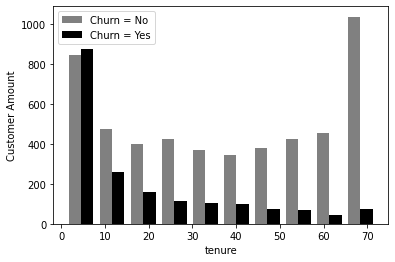

In [15]:
plt.xlabel("tenure")
plt.ylabel("Customer Amount")

plt.hist([churn_no,churn_yes],color=['gray','black'],label=['Churn = No','Churn = Yes'])
plt.legend()

In [16]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes =df1[df1.Churn=='Yes'].MonthlyCharges

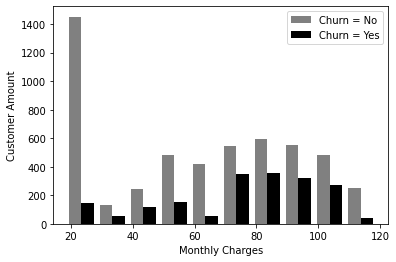

In [17]:
plt.xlabel("Monthly Charges")
plt.ylabel("Customer Amount")

plt.hist([mc_churn_no, mc_churn_yes],color=['gray','black'],label=['Churn = No','Churn = Yes'])
plt.legend()

In [18]:
def unique_values(st):
       for column in st:
            if st[column].dtypes=='object':
                print(f'{column}: {st[column].unique()}')

In [19]:
unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
df1 = df1.replace('No internet service','No')
df1 = df1.replace('No phone service','No') 

In [21]:
unique_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
yes_or_no = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [23]:
for col in yes_or_no:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [24]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [25]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [26]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [27]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3370,1,0,1,1,53,0,0,1,1,1,...,1,0,0,1,0,0,1,0,0,0
38,0,0,0,0,34,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
3927,0,0,1,0,3,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [30]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [34]:
X_train.shape

(5625, 26)

In [35]:
X_test.shape

(1407, 26)

In [36]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [37]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 1ms/step - loss: 0.4920 - accuracy: 0.7548
Epoch 2/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7927
Epoch 3/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4203 - accuracy: 0.7956
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8000
Epoch 5/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8046
Epoch 6/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8032
Epoch 7/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8068
Epoch 8/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8041
Epoch 9/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8069
Epoch 10/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4052 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8389
Epoch 82/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8386
Epoch 83/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8393
Epoch 84/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3420 - accuracy: 0.8364
Epoch 85/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8384
Epoch 86/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3436 - accuracy: 0.8375
Epoch 87/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3422 - accuracy: 0.8340
Epoch 88/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3453 - accuracy: 0.8341
Epoch 89/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.8384
Epoch 90/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 

176/176 [==============================] - 0s 1ms/step - loss: 0.3171 - accuracy: 0.8548
Epoch 161/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8501
Epoch 162/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.8505
Epoch 163/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8519
Epoch 164/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8526
Epoch 165/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3148 - accuracy: 0.8491
Epoch 166/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8516
Epoch 167/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8560
Epoch 168/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8521
Epoch 169/200
176/176 [==============================] - 0s 1ms/step - loss: 0.3146 - a

In [39]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 906us/step - loss: 0.5856 - accuracy: 0.7576


[0.5855806469917297, 0.7576403617858887]

In [40]:
yp = model.predict(X_test)
yp[:5]

array([[0.38505214],
       [0.6070871 ],
       [0.00079012],
       [0.73935276],
       [0.6802407 ]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0]

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Text(51.0, 0.5, 'True Value')

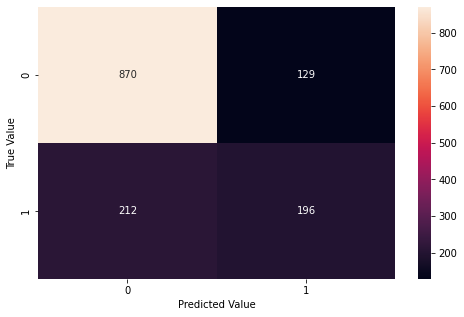

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

In [93]:
(825+239)/(825+174+169+239)

0.7562189054726368

In [95]:
825/(825+169)

0.829979879275654

In [96]:
239/(174+239)

0.5786924939467313

In [97]:
825/(825+174)

0.8258258258258259

In [98]:
239/(169+239)

0.5857843137254902

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       999
           1       0.60      0.48      0.53       408

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.75      0.76      0.75      1407

